## Model for prediction 

In [1]:
import os
import sys
import django
import joblib

# Navigate two levels up to the Django project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)

# Set the Django settings module
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'HealthMonitoringProject.settings')

# Initialize Django
django.setup()


In [2]:
from django.conf import settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  mlxtend.plotting  import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score

In [3]:
# Define dataset path using BASE_DIR from settings
dataset_path = os.path.join(settings.BASE_DIR, 'MainApp', 'templates', 'csvfile', 'historical_data.csv')

# Load the dataset
dataset = pd.read_csv(dataset_path)
dataset

,name,heart_rate,blood_pressure,sleep_duration,oxygen_saturation,body_temperature,bmi,status
0,Sagar Thapa,70,120.80,6,95,37.0,20.0,Normal
1,Rajdeep Karki,85,130.85,5,92,37.5,27.0,Abnormal
2,Anjali Sharma,72,122.82,8,97,36.9,22.0,Normal
3,Samir Rai,78,125.83,7,91,38.0,24.0,Abnormal
4,Anisha Sharma,71,123.81,6,96,37.2,23.0,Normal
...,...,...,...,...,...,...,...,...
213,Kavita Mehta,74,125.00,8,98,37.5,23.9,Normal
214,Tanu Bhandari,81,133.30,6,92,37.6,27.4,Abnormal
215,Nikhil Sharma,69,121.00,7,96,37.2,22.6,Normal
216,Arvind Joshi,76,130.20,6,94,37.5,25.1,Normal


In [4]:
dataset.isnull().sum()

name                 0
heart_rate           0
blood_pressure       0
sleep_duration       0
oxygen_saturation    0
body_temperature     0
bmi                  0
status               0
dtype: int64

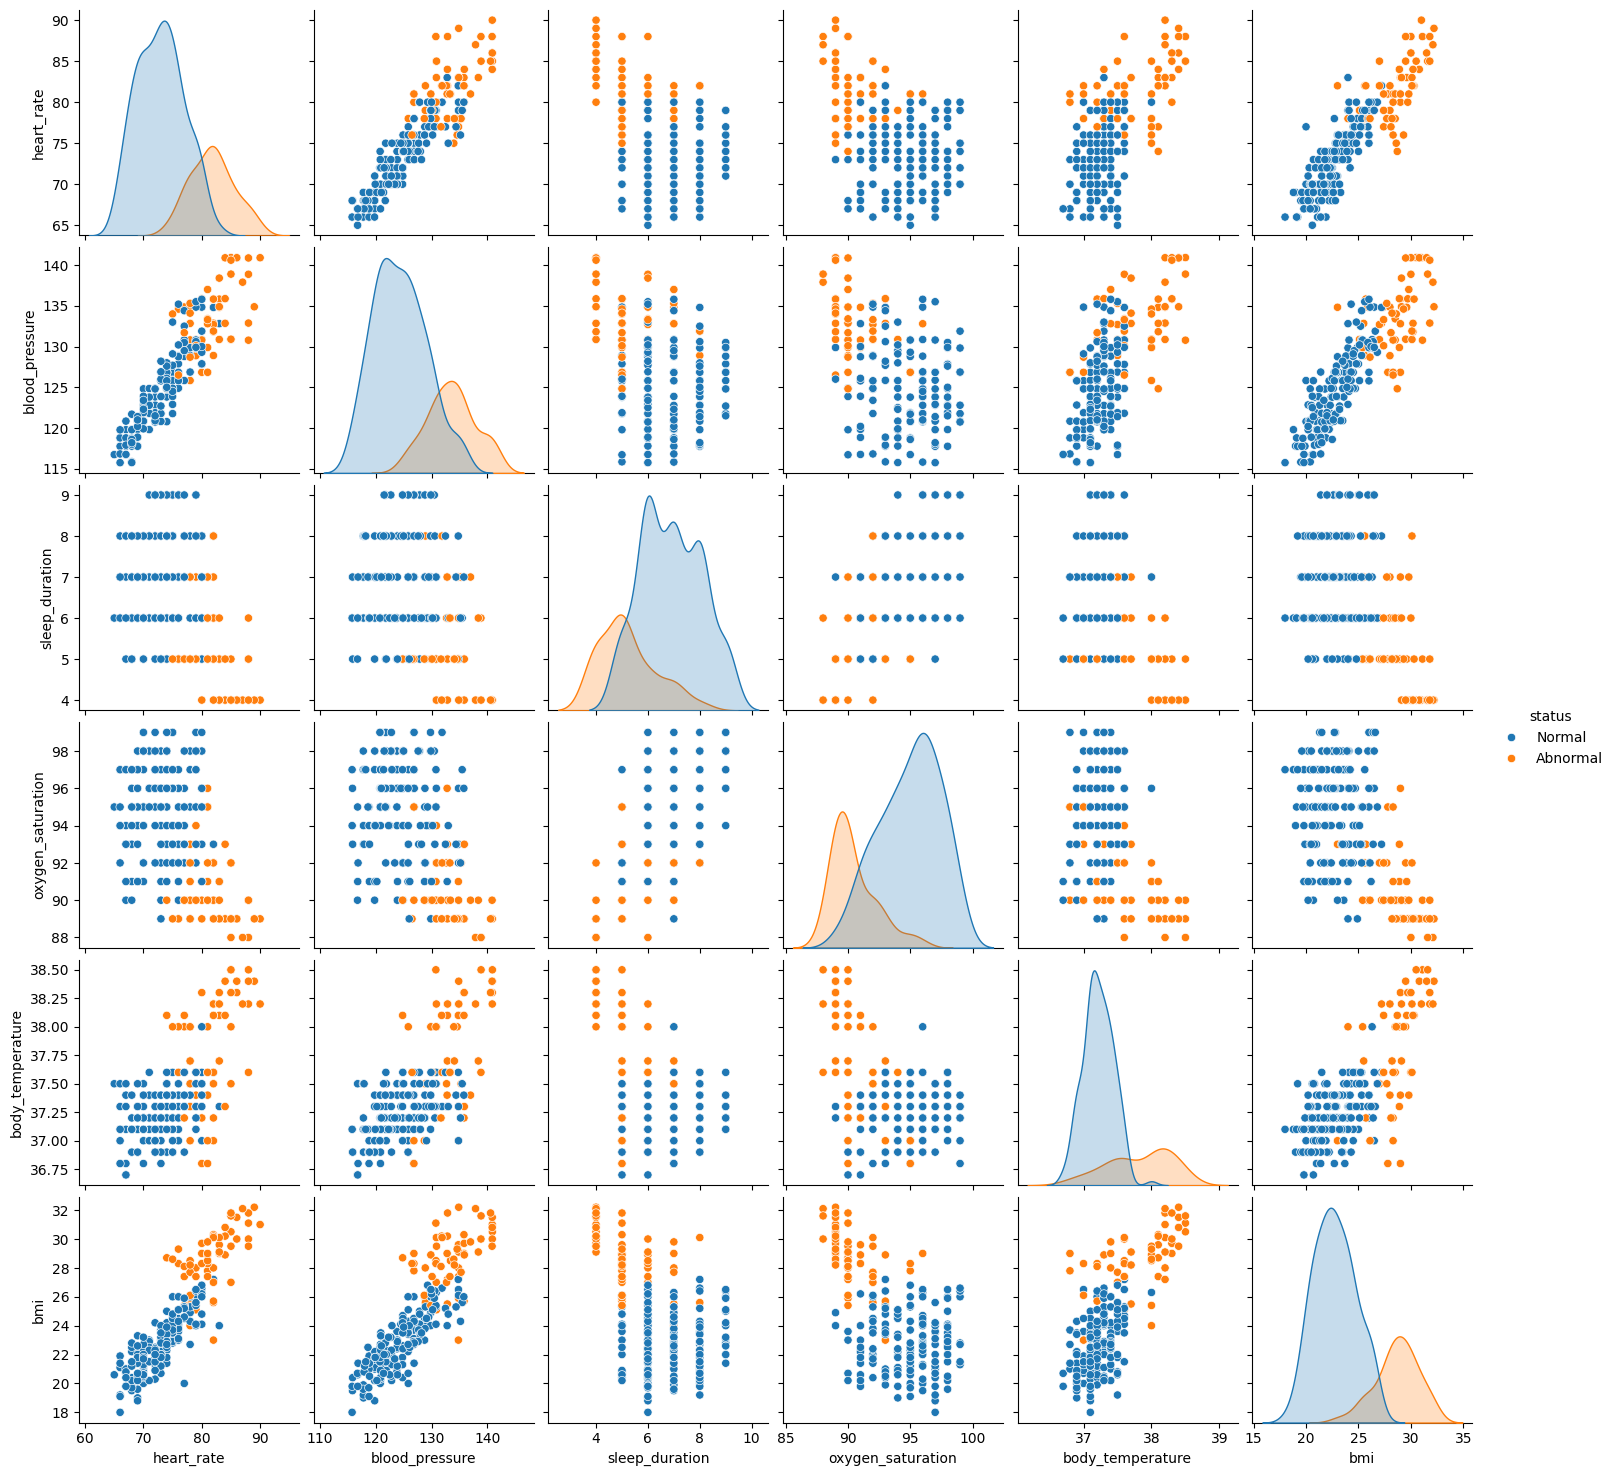

In [5]:
sns.pairplot(dataset,hue="status")

In [6]:
lb=LabelEncoder()
lb.fit_transform(dataset["status"])


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [7]:
dataset["status"]=lb.fit_transform(dataset["status"])


In [8]:
dataset

,name,heart_rate,blood_pressure,sleep_duration,oxygen_saturation,body_temperature,bmi,status
0,Sagar Thapa,70,120.80,6,95,37.0,20.0,1
1,Rajdeep Karki,85,130.85,5,92,37.5,27.0,0
2,Anjali Sharma,72,122.82,8,97,36.9,22.0,1
3,Samir Rai,78,125.83,7,91,38.0,24.0,0
4,Anisha Sharma,71,123.81,6,96,37.2,23.0,1
...,...,...,...,...,...,...,...,...
213,Kavita Mehta,74,125.00,8,98,37.5,23.9,1
214,Tanu Bhandari,81,133.30,6,92,37.6,27.4,0
215,Nikhil Sharma,69,121.00,7,96,37.2,22.6,1
216,Arvind Joshi,76,130.20,6,94,37.5,25.1,1


In [9]:
x=dataset.iloc[:,1:-1]
y=dataset["status"]

In [10]:
# sc=StandardScaler()
# x=sc.fit_transform(x)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [12]:
rf=RandomForestClassifier(n_estimators=50, min_samples_split=2, bootstrap=True,max_depth=None,max_features='sqrt',min_samples_leaf=4) #Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

rf.fit(x_train,y_train)
train_score=rf.score(x_train,y_train)*100
test_score=rf.score(x_test,y_test)*100
print(train_score,test_score)

100.0 91.42857142857143


In [13]:
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)
train_score=sv.score(x_train,y_train)*100
test_score=sv.score(x_test,y_test)*100
print(train_score,test_score)


97.67441860465115 94.28571428571428


In [14]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=13,weights='uniform') #'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'
knn.fit(x_train,y_train)
train_score=knn.score(x_train,y_train)*100
test_score=knn.score(x_test,y_test)*100
print(train_score,test_score)


95.34883720930233 92.57142857142857


In [15]:
estimators=[("rf",RandomForestClassifier(n_estimators=50, min_samples_split=2, bootstrap=True,max_depth=None,max_features='sqrt',min_samples_leaf=4)),("sv",SVC(kernel="linear")),("knn",KNeighborsClassifier(metric='euclidean',n_neighbors=13,weights='uniform'))]

In [16]:
vc=VotingClassifier(estimators=estimators,voting='hard',weights=[1,3,3])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_leaf=4,
                                                     n_estimators=50)),
                             ('sv', SVC(kernel='linear')),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=13))],
                 weights=[1, 3, 3])

In [17]:
train_score=vc.score(x_train,y_train)*100
test_score=vc.score(x_test,y_test)*100
print(train_score,test_score)

95.34883720930233 94.85714285714286


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the model and parameter grid
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Best parameters and accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Fit the model with best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(x_train_scaled, y_train)

# Evaluate model
train_score = knn_best.score(x_train_scaled, y_train) * 100
test_score = knn_best.score(x_test_scaled, y_test) * 100
print(f"Training Accuracy: {train_score}%")
print(f"Testing Accuracy: {test_score}%")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 1.0
Training Accuracy: 100.0%
Testing Accuracy: 89.71428571428571%


In [19]:
cf=confusion_matrix(y_test,vc.predict(x_test))

<Axes: >

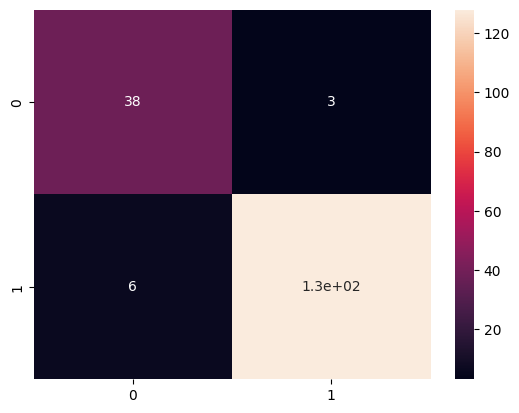

In [20]:
sns.heatmap(cf,annot=True)

In [21]:
precision_score=precision_score(y_test,vc.predict(x_test))*100
recall_score=recall_score(y_test,vc.predict(x_test))*100

f1_score=f1_score(y_test,vc.predict(x_test))*100

print(precision_score,recall_score,f1_score)

97.70992366412213 95.52238805970148 96.60377358490567


In [22]:
# Save the model
model_path = os.path.join(settings.BASE_DIR, 'MainApp', 'ML', 'Model_Voting_Classifier.pkl')
joblib.dump(vc, 'Model_Voting_Classifier.pkl')


['Model_Voting_Classifier.pkl']

In [23]:
vc.predict([[71,123.81,6,96,37.2,23]]), #Anisha Sharma,71,123.81,6,96,37.2,23,Normal


c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([1]),)

In [24]:
vc.predict([[80,126.84,5,90,36.8,29]])#Rajesh Bhandari,80,126.84,5,90,36.8,29,Abnormal


c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [25]:
vc.predict([[75,126.84,9,99,37.2,26]]) #Nisha Gurung,75,126.84,9,99,37.2,26,Normal


c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
vc.predict([[88,138.87,6,88,37.6,30]])#Krishna Bhandari,88,138.87,6,88,37.6,30,Abnormal


c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
vc.predict([[80,126.84,5,90,36.8,29]])#Rajesh Bhandari,80,126.84,5,90,36.8,29,Abnormal



c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Desktop\Health-Monitoring-Dashboard\healthEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])